<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Python BootCamp </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2023, Paris | © Saeed VARASTEH [RP] | Jean SAVINIEN
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="images/homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 05 </h4>
    </span>
</div>

Make sure you read all the readings and content from the lectures on Brightspace.

If you have worked with anyone, please enter their names below:

In [1]:
Names = ""

<div class="alert-info"> You can download the data you need for this exercise here: <a href="https://www.dropbox.com/scl/fi/bdh8iiq7tg1m7zl881mrl/session.zip?rlkey=z9rv16b9zw94eyukm4jsoxzey&dl=0"> Session Data </a> </div>

### Homework 05 - User Sessions

---

The aim of this exercise is to assess your ability to apply your theoretical knowledge to a practical case in the universe of online advertising.

Our aim is to do some __exploratory data analysis (EDA)__, not modelling.

#### Dataset description

You will be given two files: __session_clicks.csv__ and __session-buys.csv__.

The __session_clicks.csv__ file consists of the clicks made by the users on the items during a session.

Each line of the file has the following format `Session ID`, `Timestamp`, `Item ID`, and `Category`

- `Session ID`: the unique identifier of the session. A session can have one or more clicks.

- `Timestamp`: the date and time when the click occurred. Format of YYYY-MM-DD hh:mm:ss.

- `Item ID`: the unique identifier of the clicked item.

- `Category`: the context of the click. A number from 0 to 14.
    - 0 indicates missing values, a number between 1 and 12 is a category identifier (e.g. sports), 13 indicates a special offer and 14 represents all other brands.

The file __session-buys.csv__ consists of the buy events.

Each line of the file has the following format `Session ID`, `Timestamp`, `Item ID`, `Price`, and `Quantity`

- `Price`: the price of the purchased item.

- `Quantity`: the buy quantity.

__Your Task__

Read the datasets and explore the data, create visualisations and look for patterns.

You are not given a specific task to do! You are the data analyst, extract as much information as you can from these files based on what you have learned in class. Use Pandas functions, visualisation, etc.

Comment/document everything.

Here are some steps you can follow to get started:

- Read the datasets into two separate dataframes: __clicks__ and __buys__.
- Check for missing values.
- Check column data types.
- Convert the `ts` column to a datetime column.
- Use the `ts` column to create some time-based columns such as: `year`, `month`, `day`, `hour`, `week` and `weekday`.
- Describe all numerical columns.

And here are some questions you can answer: (Add as many questions as you like to this list and try to answer them)

- What is the average number of clicks/purchases per hour?
- What time of day do people tend to visit/buy more?
- What is the average number of clicks/purchases per day of the week in the datasets?
- What day of the week do people tend to visit/buy more items?
- How many sessions are there per category?
- How long is the longest session?
- What items were sold in the longest session? When did this happen?
- Do longer sessions result in more purchases?
- Is there a relationship between session length and number of purchases?
- What are the most popular (most sold) items?


- What general marketing strategies (in terms of sending promotional emails, site advertising or personalised recommendations) can you think of for this online retailer?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [9]:
clicks = pd.read_csv("test/exercises/clicks.csv") 
print("clicks dataset shape",clicks.shape)
clicks.head()
# clicks.info()
#clicks.describe()


FileNotFoundError: [Errno 2] No such file or directory: 'test/exercises/clicks.csv'

In [3]:
buys = pd.read_csv(r'C:\Users\emily\Desktop\Python\test\exercises\session\session_buys.csv')
print("buys dataset shape",buys.shape)
buys.head()

buys dataset shape (1048575, 5)


,sessionID,ts,itemID,price,cnt
0,420374,2014-04-06 18:44:58.314000+00:00,214537888,12462,1
1,420374,2014-04-06 18:44:58.325000+00:00,214537850,10471,1
2,281626,2014-04-06 09:40:13.032000+00:00,214535653,1883,1
3,420368,2014-04-04 06:13:28.848000+00:00,214530572,6073,1
4,420368,2014-04-04 06:13:28.858000+00:00,214835025,2617,1


In [4]:
# your codes here
#covert ts column to datetime and create new columns for year,month,day,hour,week,weekday
clicks['ts'] = pd.to_datetime(clicks['ts'])
clicks['year'] = clicks['ts'].dt.year  # create a column for data'year' of 'ts' column
clicks['month'] = clicks['ts'].dt.month  # month column
clicks['day'] = clicks['ts'].dt.day  # day column
clicks['hour'] = clicks['ts'].dt.hour  # hour column
clicks['week'] = clicks['ts'].dt.isocalendar().week  # ISO week
clicks['weekday'] = clicks['ts'].dt.weekday  # Monday is 0 and Sunday is 6
clicks.head(10)


,sessionID,ts,itemID,cat,year,month,day,hour,week,weekday
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,2014,4,7,10,15,0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,2014,4,7,10,15,0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,2014,4,7,10,15,0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,2014,4,7,10,15,0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,2014,4,7,13,15,0
5,2,2014-04-07 13:57:19.373000+00:00,214662742,0,2014,4,7,13,15,0
6,2,2014-04-07 13:58:37.446000+00:00,214825110,0,2014,4,7,13,15,0
7,2,2014-04-07 13:59:50.710000+00:00,214757390,0,2014,4,7,13,15,0
8,2,2014-04-07 14:00:38.247000+00:00,214757407,0,2014,4,7,14,15,0
9,2,2014-04-07 14:02:36.889000+00:00,214551617,0,2014,4,7,14,15,0


---

In [5]:
#covert ts column to datetime and create new columns for year,month,day,hour,week,weekday
buys['ts'] = pd.to_datetime(buys['ts'])
buys['year'] =buys['ts'].dt.year
buys['month'] = buys['ts'].dt.month
buys['day'] = buys['ts'].dt.day
buys['hour'] = buys['ts'].dt.hour
buys['week'] = buys['ts'].dt.isocalendar().week  # ISO week
buys['weekday'] = buys['ts'].dt.weekday  # Monday is 0 and Sunday is 6
buys.head(6)

,sessionID,ts,itemID,price,cnt,year,month,day,hour,week,weekday
0,420374,2014-04-06 18:44:58.314000+00:00,214537888,12462,1,2014,4,6,18,14,6
1,420374,2014-04-06 18:44:58.325000+00:00,214537850,10471,1,2014,4,6,18,14,6
2,281626,2014-04-06 09:40:13.032000+00:00,214535653,1883,1,2014,4,6,9,14,6
3,420368,2014-04-04 06:13:28.848000+00:00,214530572,6073,1,2014,4,4,6,14,4
4,420368,2014-04-04 06:13:28.858000+00:00,214835025,2617,1,2014,4,4,6,14,4
5,140806,2014-04-07 09:22:28.132000+00:00,214668193,523,1,2014,4,7,9,15,0


In [58]:
#Q1:What is the average number of purchases per hour?
# Group by 'hour' and count the number of purchases(purchased item quantity) in each hour in session_buys table
purchases_per_hour = buys.groupby(['hour'])['cnt'].sum()
#create dataframe
purchases_per_hour_df=pd.DataFrame(purchases_per_hour)
purchases_per_hour_df

,cnt
hour,
0,1313
1,967
2,808
3,1297
4,3684
5,10332
6,19780
7,31754
8,39003


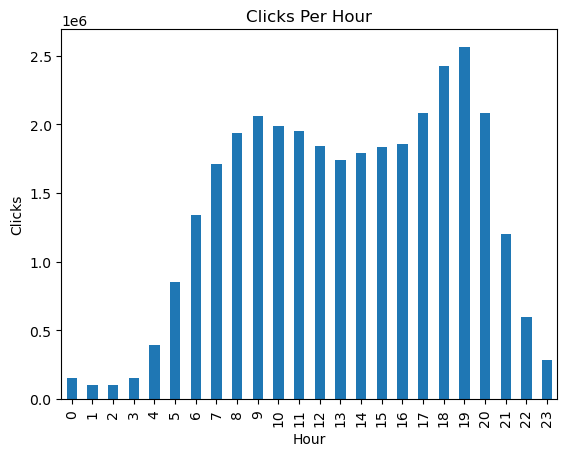

In [7]:
# Q2: What time of day do people tend to buy more?
# Answer:  people tend to buy more at 18:00 and 19:00 of every day 

# Group by 'hour' and count the number of clicks in each hour in session_clicks table
clicks_per_hour = clicks.groupby(['hour'])['ts'].count()
# Bar plot of clicks per hour
clicks_per_hour.plot(kind='bar', xlabel='Hour', ylabel='Clicks', title='Clicks Per Hour')
plt.show()

In [60]:
# Q3:What is the average number of purchases per day of the week in the datasets?
# Answer: as below 
# Group by 'hour' and count the number of purchases(purchase item quantity) in each weekday in session_buys table
purchases_weekday = buys.groupby(['weekday'])['cnt'].sum()
#create dataframe for the table
purchases_weekday_df = pd.DataFrame(purchases_weekday)
purchases_weekday_df

,cnt
weekday,
0,109510
1,29370
2,74658
3,76489
4,71526
5,87186
6,157088


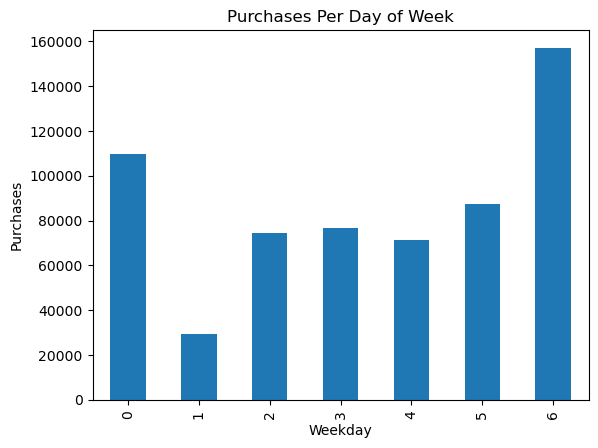

In [9]:
# Q4:What day of the week do people tend to buy more items?
# Answer: Sunday

# Group by 'hour' and count the number of purchases in each weekday in session_buys table
purchases_weekday = buys.groupby(['weekday'])['cnt'].sum()
# Bar plot of purchases per weekday
purchases_weekday.plot(kind='bar', xlabel='Weekday', ylabel='Purchases', title='Purchases Per Day of Week')
plt.show()


In [63]:
# Q5:How many sessions are there per category?
# Answer: as below

# Group by 'category' and count the number of sessionID in session_clicks table
sessions_per_category= clicks.groupby(['cat'])['sessionID'].count()
# Create a dataframe 
sessions_per_category_df=pd.DataFrame(sessions_per_category)
# Change the column name‘sessionID’
sessions_per_category_df.rename(columns={'sessionID': 'total_session'}, inplace=True)
sessions_per_category_df

,total_session
cat,
0,16337653
1,1671754
2,1292249
3,789713
4,480569
5,471923
6,414696
7,389910
8,44840


In [64]:
# Q6:How long is the longest session?

# Merge two tables with sessionID
merged_session = pd.merge(clicks,buys, on='sessionID', how='outer')
#Group by the 'sessionID' column and calculate the time differences within each group, get highest number for difference
session_buys_longest = merged_session.groupby('sessionID')['ts_x'].diff().max()
print(f'The longest time of session is',session_buys_longest )


The longest time of session is 0 days 00:59:59.995000


In [65]:
# Q7:What items were sold in the longest session?

#Calculate time difference and find the biggest difference
session_length = merged_session.groupby('sessionID')['ts_x'].diff().groupby(merged_session['sessionID']).agg('max')
#Order in descend
sorted_result = session_length.sort_values(ascending=False)
#Find the longest session
session_longest = sorted_result.head(1).index[0]
#Find the itemID of the longest session
item_longest_session=buys.loc[session_longest, 'itemID']
item_longest_session

print(f'The item sold in the longest session is',item_longest_session)

The item sold in the longest session is 214834995


In [66]:
# Q7: When did this happen?(items were sold in the longest session)

# Find the row of the longest session,get the ts value
purchase_time_longest_session = buys.loc[session_longest, 'ts']

print(f'The session happen time is ',purchase_time_longest_session)

The session happen time is  2014-08-11 20:40:36.473000+00:00


In [67]:
# Q8: Do longer sessions result in more purchases?
# Answer:NO.Correlation between session length and purchase count: -0.007486447650497082,session length and purchase have negative correlation.

# Group by 'sessionID' in merged_session and count the time length of sesssion
merged_session['session_length'] = merged_session.groupby('sessionID')['ts_x'].diff()

#Transfer all date time to seconds value and add a 'session_length' column in merged session
merged_session['session_length']= merged_session['session_length'].dt.total_seconds()

# change time to seconds length and caculate the coorelation
correlation =merged_session['session_length'].corr(merged_session['cnt'])
print(f'Correlation between session length and purchase count: {correlation}')

Correlation between session length and purchase count: -0.007486447650497082


<Axes: >

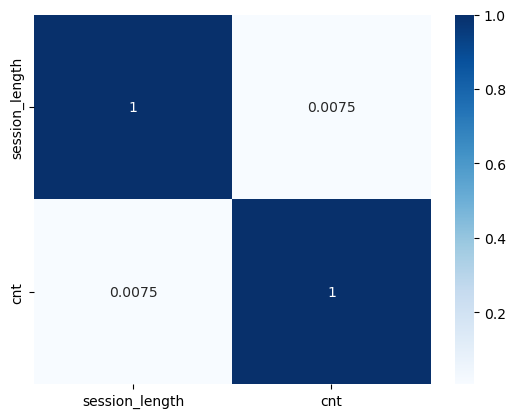

In [68]:
# Q9:Is there a relationship between session length and number of purchases?
# Answer: No,the coorelation between session length and purchase number is weak(0.0075) and color is light blue, the lighter color , the weaker coorelation.

#coorelation with session length and purchase number,absolute value of the coorelation
out=merged_session[['session_length','cnt']].corr().abs()

#heatmap for the coorelationship,setting up the color is blue,the darker color, the stronger coorelation
sns.heatmap(out, cmap="Blues",annot=True)


In [69]:
# Q10:What are the most popular (most sold) items?
#Answer:itemID    1178837797(cnt:9939)

# create DataFrame which has itemID and cnt as column,sum up the cnt and get the highest number for cnt
max_buys_df = buys.groupby('itemID')['cnt'].sum().reset_index().max()
max_buys_df

itemID    1178837797
cnt             9939
dtype: int64

In [70]:
# Q11:What general marketing strategies (in terms of sending promotional emails, site advertising or personalised recommendations) can you think of for this online retailer?
'''
(1)Sending promo emails:
Set up automated email sequences for abandoned cart reminders or promotion campaingan at 18:00-19:00 on Monday and Sunday(purchase peaktime).

(2)Web site advertising:
Put the hot sell item(cat 13,1,2) in the best position of website,maybe banner or landing page.

(3)Personalised recommendation:
According to one user's session length and click history,add cart history(they should have this data) to provide personalised product recommandation.

'''

"\n(1)Sending promo emails:\nSet up automated email sequences for abandoned cart reminders or promotion campaingan at 18:00-19:00 on Monday and Sunday(purchase peaktime).\n\n(2)Web site advertising:\nPut the hot sell item(cat 13,1,2) in the best position of website,maybe banner or landing page.\n\n(3)Personalised recommendation:\nAccording to one user's session length and click history,add cart history(they should have this data) to provide personalised product recommandation.\n\n"

In [2]:
# 1.Monthly purchase quantity: There are missing data of three months(5,6,7).April has highest purchase from this raw data. 
purchases_month = buys.groupby(['month'])['cnt'].sum()
purchases_month

NameError: name 'buys' is not defined

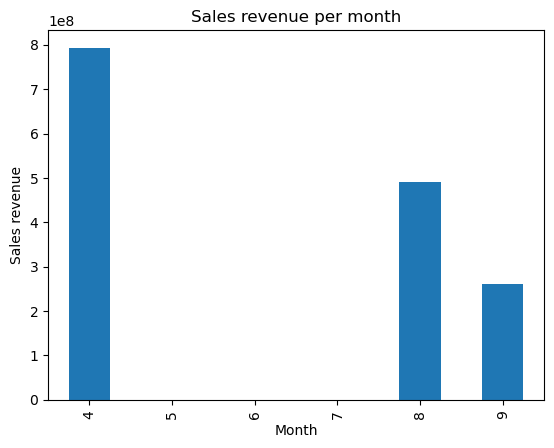

month
4    793370982
5            0
6            0
7            0
8    490520704
9    261606892
Name: total sale, dtype: int64

In [19]:
#2.Sales revenue per month: April has highest sales revenue, which is almost twice of August and triple of September.Why April has higher sales when purchase quantity is almost same with August? Maybe different items?
buys['total sale']=buys['cnt']*buys['price']
sale_revenue_per_month=buys.groupby(['month'])['total sale'].sum()
sale_revenue_per_month.plot(kind='bar', xlabel='Month', ylabel='Sales revenue', title='Sales revenue per month')
plt.show()
sale_revenue_per_month

In [20]:
# 3.April and August purchase item analysis: this company sells almost different items in April and August, there are only 3 same item in top 100 sells.Why don't they sell the hot sell items? Is it the seasonal item?
#In April,the hot sell itemID is 214821277, but in August,the hot sell itemID is 214853420. 

#new table for april and august, which only show itemID and count,descend according to the count
april_data = buys[buys['month'] == 4][['itemID', 'cnt']]
august_data = buys[buys['month'] == 8][['itemID', 'cnt']]
april_data_total_item = april_data.groupby(['itemID'])['cnt'].sum().reset_index()
april_data_total_item = april_data_total_item.sort_values(by='cnt', ascending=False)
august_data_total_item =august_data.groupby(['itemID'])['cnt'].sum().reset_index()
august_data_total_item =august_data_total_item.sort_values(by='cnt', ascending=False)
# choose top 1 selled items of april
april_data_total_item_top1 = april_data_total_item.head(1)
april_data_total_item_top1

,itemID,cnt
7833,214821277,8193


In [21]:
# choose top 1 selled items of august
august_data_total_item_top1=august_data_total_item.head(1)
august_data_total_item_top1


,itemID,cnt
9067,214853420,8160


In [22]:
# Exact top 100 item in April and August,merge on itemid and find same itemID in two tables
april_data_total_item_top100 = april_data_total_item.head(100)
august_data_total_item_top100=august_data_total_item.head(100)
merged_data = pd.merge(april_data_total_item_top100, august_data_total_item_top100, on='itemID', how='inner', suffixes=('_april', '_august'))
merged_data

,itemID,cnt_april,cnt_august
0,214717003,1413,1087
1,214716928,692,543
2,214716982,655,706
